In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('C:\\Users\\USER\\Downloads\\employee.csv')
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [5]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [8]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# Reset the index as "name".

In [9]:
df = df.set_index('name')
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Select rows for specific names Jack Morgan and Josh wills.

In [10]:
df.loc[['Josh Wills','Jack Morgan']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Josh Wills,54.0,52000.0,F,Finance,G3,901
Jack Morgan,32.0,35000.0,M,Finance,G2,674


# Select data for multiple values "Sales" and “Finance”.

In [11]:
df[(df['department']=='Finance')|(df['department']=='Sales')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 700 performance score.

In [12]:
df[(df['performance_score']>700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 500 and less than 700 performance score

In [13]:
df[(df['performance_score']>500)&(df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# Check and handle missing values in the dataset

In [19]:
#Missing value in Colum Age
import math 

#For Skumar, 

df1= df.fillna({'age':20},limit=1)

#For Satyam Sharma, 
age_median=math.floor(df[df['grade']=='G3']['age'].median())
df1= df1.fillna({'age':age_median},limit=1)
df1

#Handling missing value in Colum income

#For Allen Smith and James Authur,
income_median=math.floor(df[df['grade']=='G3']['income'].median())
df1= df1.fillna({'income':income_median},limit=2)
df1

#Handling missing value in Colum gender

#For Allen Smith and Satyam Sharma, 
df1= df1.fillna({'gender':'M'},limit=2)
df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,62000.0,M,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,49.0,62000.0,M,Sales,G3,649
James Authur,54.0,62000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Check the outliers and handle outliers in performance score using Percentiles.

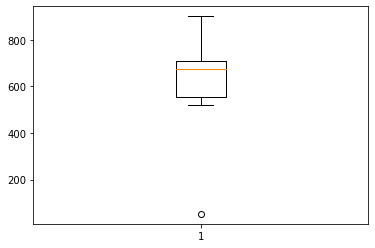

In [20]:
plt.boxplot(df['performance_score'])
plt.show()

In [21]:
q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
IQR=q3-q1
low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Lower limit : ',low_lim)
print('Upper limit : ',up_lim)

Lower limit :  323.5
Upper limit :  943.5


In [22]:
outlier=[]
for x in df['performance_score']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[53]

In [23]:
#finding the index of the outlier
out_idx=df['performance_score']<low_lim
df.loc[out_idx].index

Index(['James Authur'], dtype='object', name='name')

In [24]:
df.drop(['James Authur'],inplace=True)

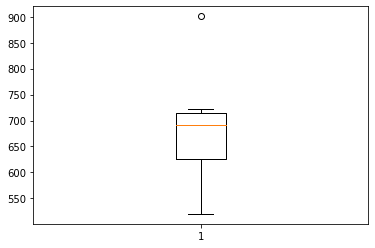

In [25]:
plt.boxplot(df['performance_score'])
plt.show()

# Check the gender column and do Dummy encoding

In [26]:
df['gender'].value_counts()

F    4
M    2
Name: gender, dtype: int64

In [27]:
pd.get_dummies(df,columns=['gender'],drop_first=True)

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.0,NaN,Operations,G3,723,0
S Kumar,NaN,16000.0,Finance,G0,520,0
Jack Morgan,32.0,35000.0,Finance,G2,674,1
Ying Chin,45.0,65000.0,Sales,G3,556,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,0
Satyam Sharma,NaN,62000.0,Sales,G3,649,0
Josh Wills,54.0,52000.0,Finance,G3,901,0
Leo Duck,23.0,98000.0,Sales,G4,709,1


# Do the standard scaling on the feature performance score.

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['performance_score']=sc.fit_transform(df[['performance_score']])
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,0.392262
S Kumar,NaN,16000.0,F,Finance,G0,-1.475872
Jack Morgan,32.0,35000.0,M,Finance,G2,-0.058667
Ying Chin,45.0,65000.0,F,Sales,G3,-1.144578
Dheeraj Patel,30.0,42000.0,F,Operations,G2,0.281831
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,-0.288733
Josh Wills,54.0,52000.0,F,Finance,G3,2.030331
Leo Duck,23.0,98000.0,M,Sales,G4,0.263425


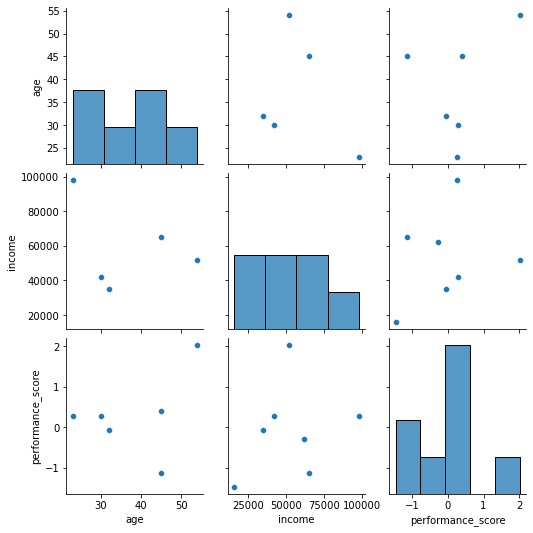

In [29]:
sns.pairplot(data=df)